In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import math
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
#g = '/media/rakshith/Seagate Expansion Drive/mraks/land sea ERA.nc'
g = '/media/rakshith/Windows/Users/mraks/land sea ERA.nc'
f7 = netCDF4.Dataset(g)
#h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
h = '/media/rakshith/Windows/Users/mraks/TGMS ERA 1959-2021, India only.nc'
f8 = netCDF4.Dataset(h)
v1 = f7['lsm'][0, :, :]

In [9]:
#Rainfall vs Pwat
X = np.linspace(1959, 2021, 63, dtype='int')
Months = ['June', 'July', 'August', 'September']

E1 = []
P1 = []
Pwat1 = []
year = [1959, 2002]
end = [1978, 2021]

for i in range(len(year)):
    a = (year[i] - 1959)*12
    b = (end[i]-1959+1)*12
    for j in range(a, b, 12):
        #for k in range(j, j+12):
        for k in range(j+5, j+9):
            sum1 = 0
            sum2 = 0
            sum3 = 0
            v8 = f8['mtpr'][k, :, :]
            v9 = f8['mer'][k, :, :]
            v10 = f8['tcwv'][k, :, :]
            sum1 = 86400*(-v9)
            sum2 = 86400*(v8)
            sum3 = v10
            x = np.multiply(v1, sum1)
            y = np.multiply(v1, sum2)
            z = np.multiply(v1, sum3)
            E1.append(np.average(x[np.nonzero(x)]))
            P1.append(np.average(y[np.nonzero(y)]))
            Pwat1.append(np.average(z[np.nonzero(z)]))

#Curve fitting
div = int((len(Pwat1))/2)
print(div)
x1, y1 = Pwat1[:div], P1[:div]
x2, y2 = Pwat1[div:], P1[div:]

80


In [10]:
from scipy.stats import binned_statistic

In [11]:
b = np.arange(0,56,2)
bin_means1, bin_edges1, binnumber1 = binned_statistic(x1, y1, statistic='mean', bins=b)
bin_means2, bin_edges2, binnumber2 = binned_statistic(x2, y2, statistic='mean', bins=b)

#standard deviation values
std1, bin_edges1, binnumber1  = binned_statistic(x1, y1, statistic='std', bins=b)
std2, bin_edges2, binnumber2  = binned_statistic(x2, y2, statistic='std', bins=b)

In [12]:
X = (bin_edges1[0:-1]+bin_edges1[1:])*0.5 #x axis

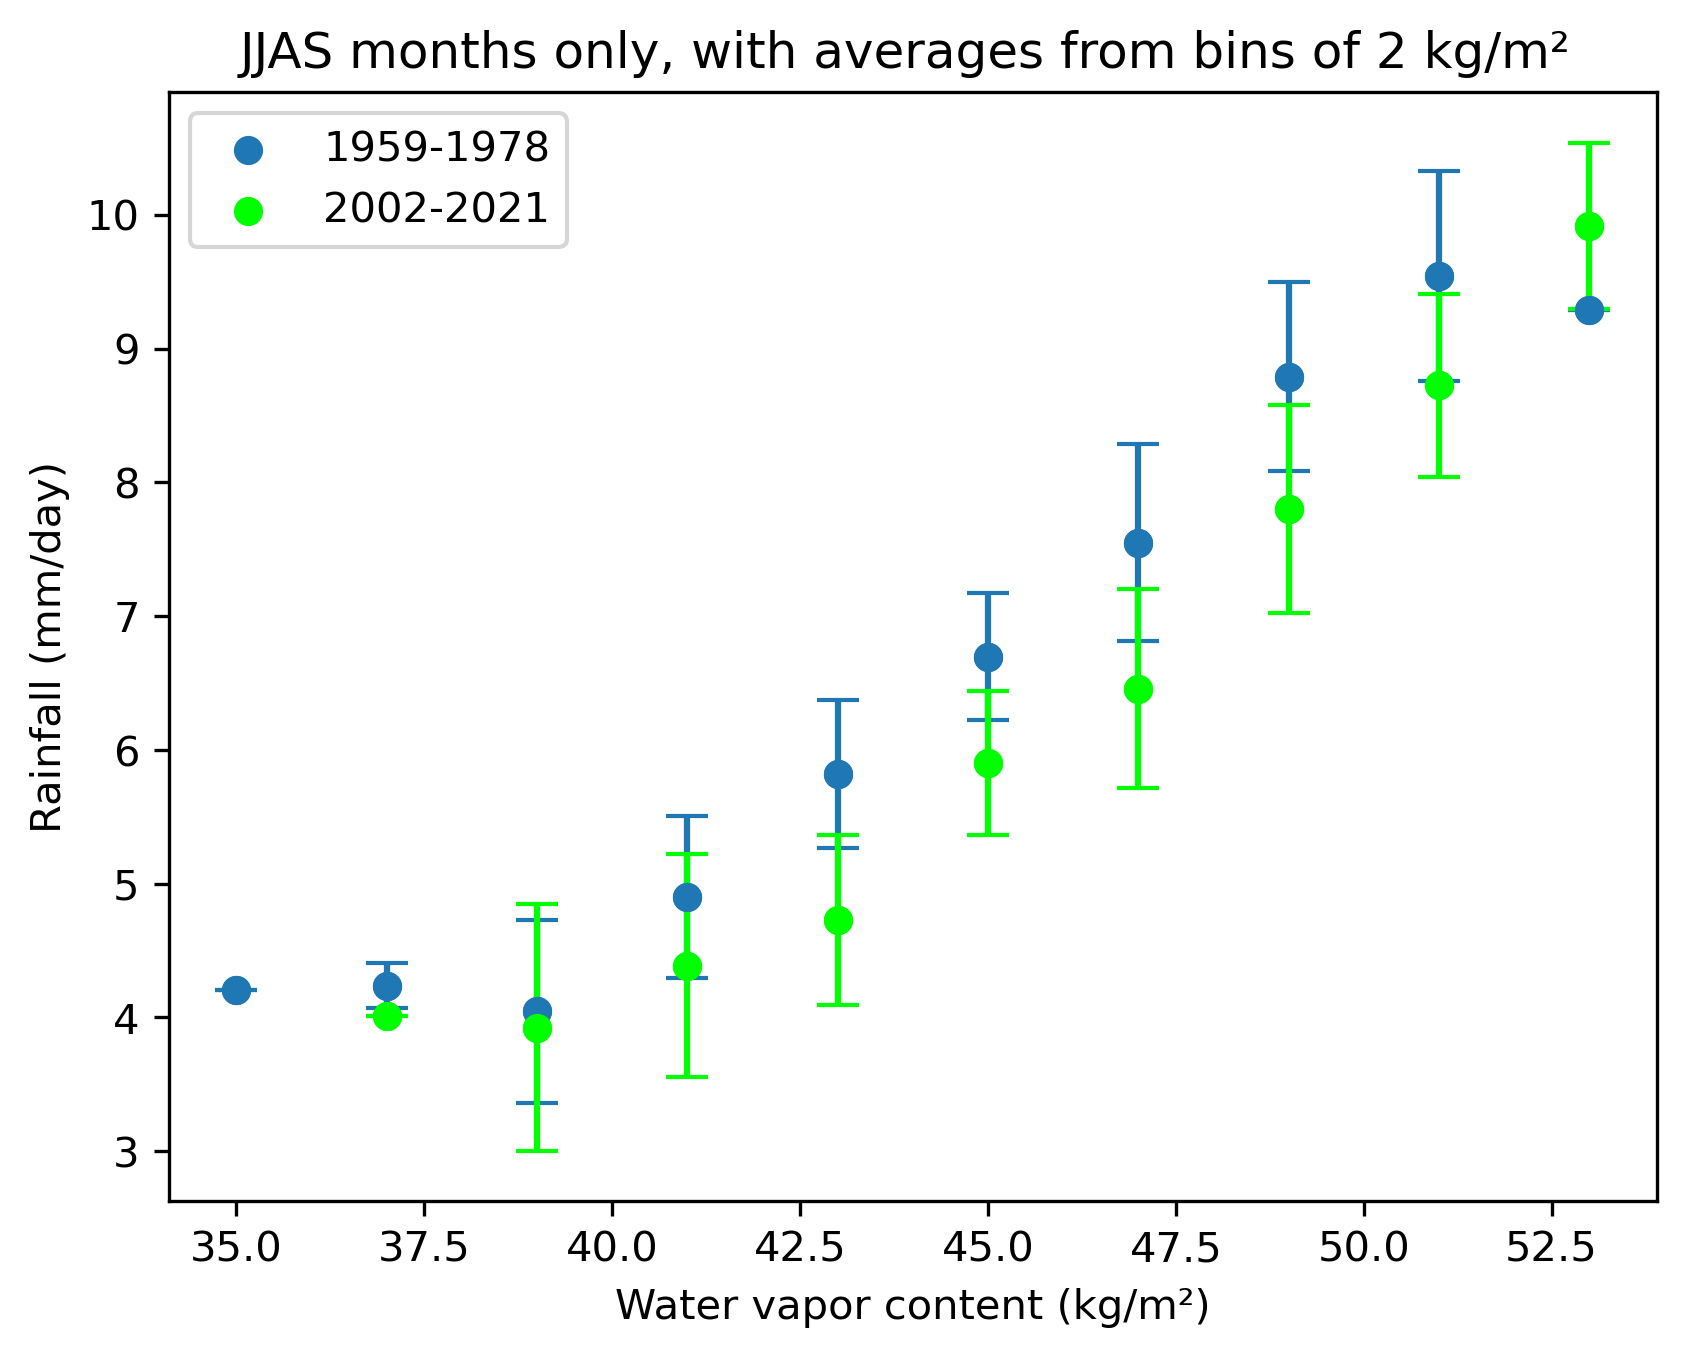

In [14]:
plt.scatter(X, bin_means1)
plt.scatter(X, bin_means2, c='lime')
plt.errorbar(X, bin_means1, yerr=std1, fmt="o", capsize=5)
plt.errorbar(X, bin_means2, yerr=std2, fmt="o", c='lime', capsize=5)
plt.xlabel('Water vapor content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('JJAS months only, with averages from bins of 2 kg/m\u00b2 ')
plt.legend(['1959-1978', '2002-2021'])

In [10]:
unique1, counts1 = np.unique(binnumber1, return_counts=True)
unique2, counts2 = np.unique(binnumber2, return_counts=True)

In [11]:
X1 = X[unique1[0]-1:unique1[-1]]
X2 = X[unique2[0]-1:unique2[-1]]
btm = [3,  9, 10, 10, 10,  7, 15, 14,  1] #for stacking of bar graphs

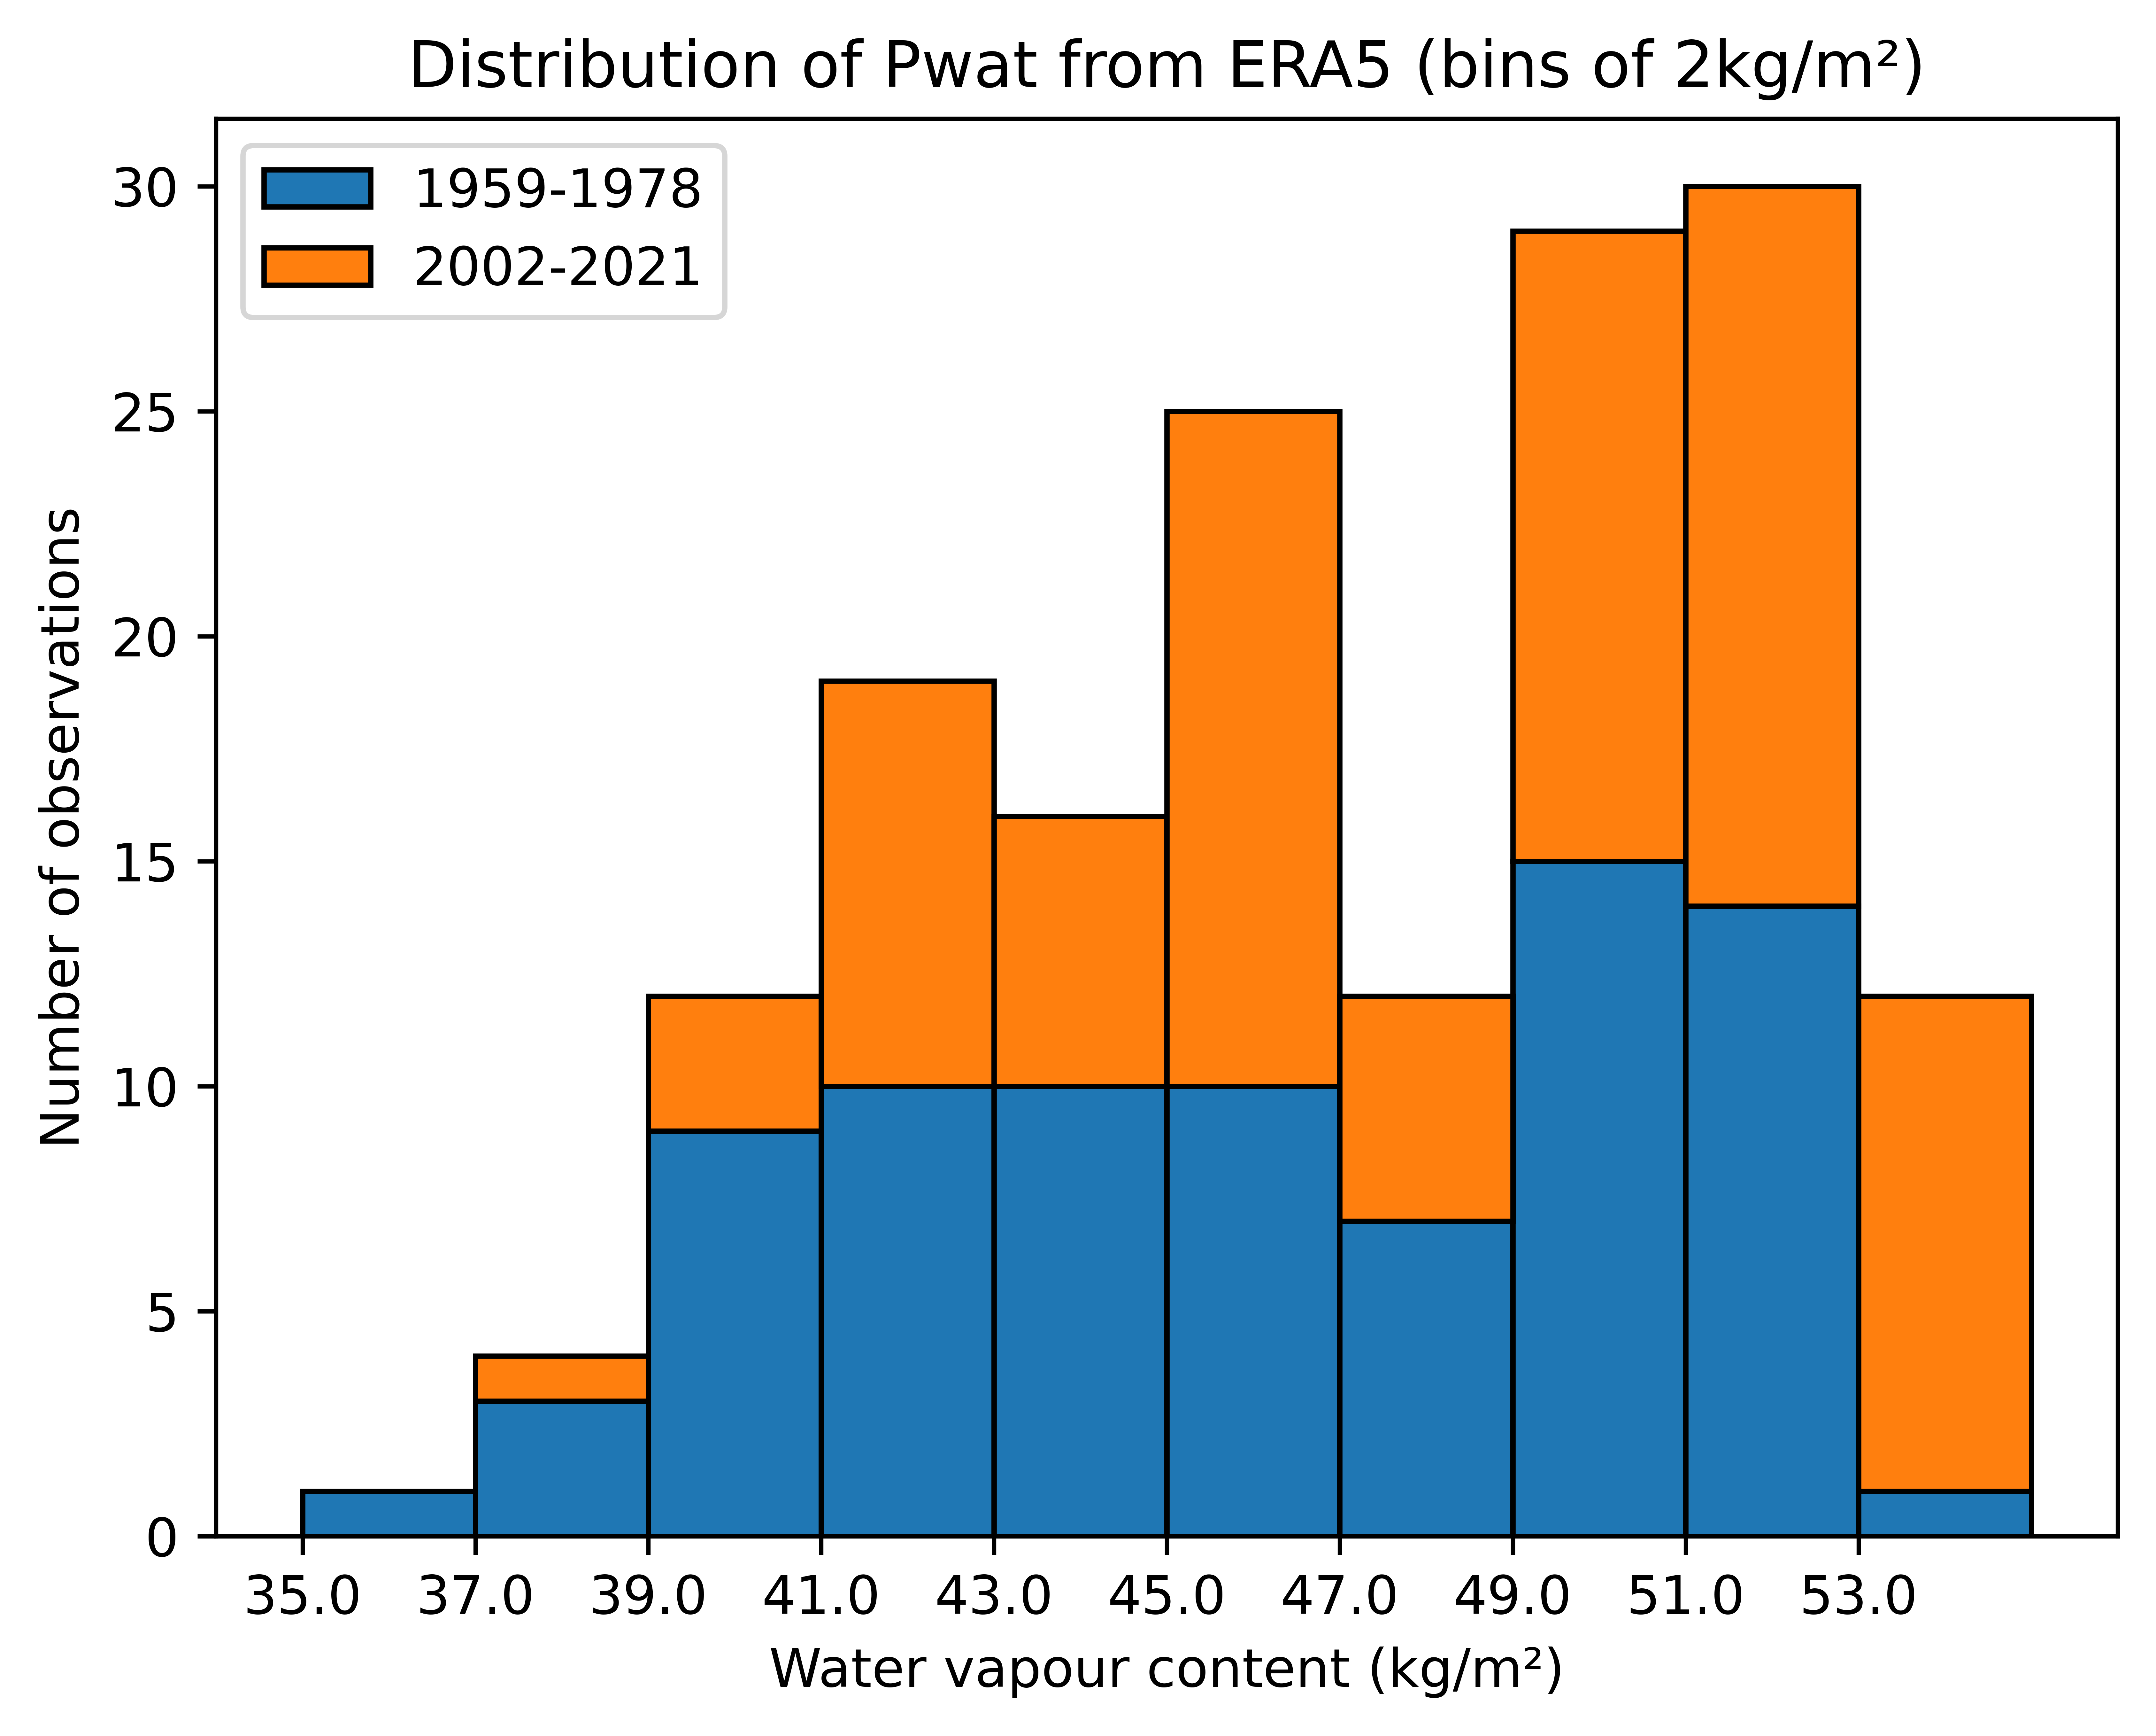

In [12]:
width1 = 1
width2 = 2
plt.bar(X1+width1, counts1, width2, edgecolor='black')
plt.bar(X2+width1, counts2, width2, bottom=btm, edgecolor='black')
plt.xticks(X1, X1)
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Number of observations')
plt.title('Distribution of Pwat from ERA5 (bins of 2kg/m\u00b2)')
plt.legend(['1959-1978', '2002-2021'])